# Big Mart Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
train=pd.read_csv("D:\\abishek\\excel data\\Trainbigmart.csv")



In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.shape

(8523, 12)

In [132]:
train_copy=train


In [11]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [13]:
train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat',inplace=True)
train['Item_Fat_Content'].replace('reg','Regular',inplace=True)


In [16]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [20]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Catagorical Columns
- Item Identifier
- Item Fat Content
- Item Type
- Outlet Identifier
- Outlet Size
- Outlet Location Type
- Outlet Type

#### Numerical Columns
- Item weight
- Item Visibility
- Item MRP
- Outlet Establishment Year



In [22]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [24]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
mode_of_outlet_size=train.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [26]:
missing_values=train['Outlet_Size'].isnull()


In [27]:
train.loc[missing_values,'Outlet_Size']=train.loc[missing_values,'Outlet_Size'].apply(lambda x: mode_of_outlet_size)

In [28]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Data Analysis

In [30]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [31]:
sns.set()

<Figure size 432x432 with 0 Axes>

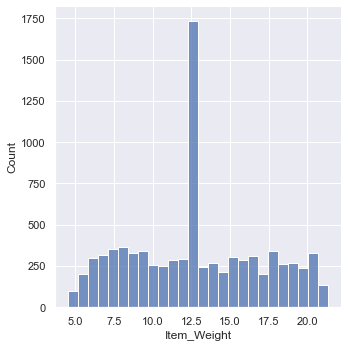

In [33]:
plt.figure(figsize=(6,6))
sns.displot(train['Item_Weight'])
plt.show()

<Figure size 432x432 with 0 Axes>

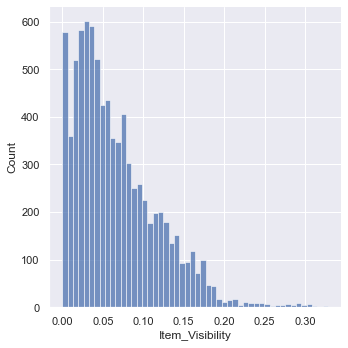

In [34]:
plt.figure(figsize=(6,6))
sns.displot(train['Item_Visibility'])
plt.show()

<Figure size 432x432 with 0 Axes>

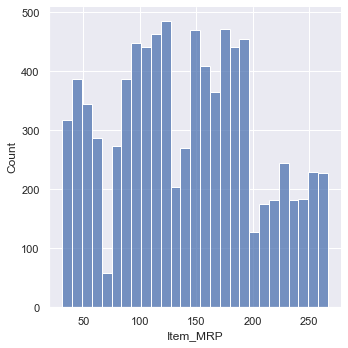

In [35]:
plt.figure(figsize=(6,6))
sns.displot(train['Item_MRP'])
plt.show()

<Figure size 432x432 with 0 Axes>

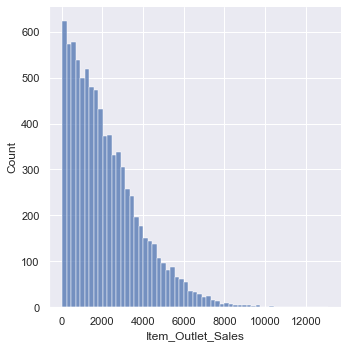

In [37]:
plt.figure(figsize=(6,6))
sns.displot(train['Item_Outlet_Sales'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


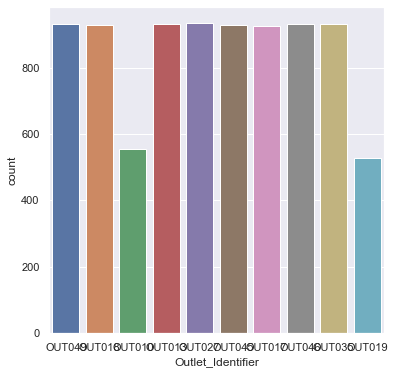

In [65]:
plt.figure(figsize=(6,6))
sns.countplot(train['Outlet_Identifier'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


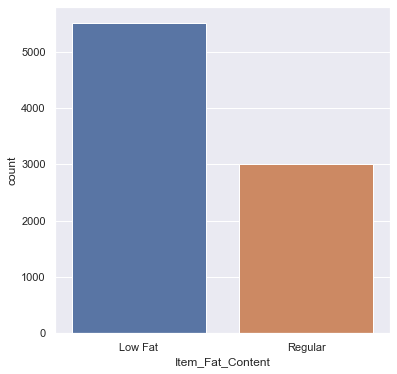

In [41]:
plt.figure(figsize=(6,6))
sns.countplot(train['Item_Fat_Content'])
plt.show()

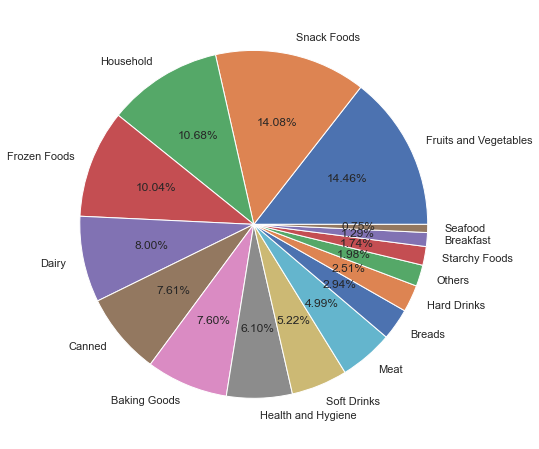

In [57]:
types=pd.DataFrame({'Type':train['Item_Type']})
counttypes=types.value_counts()
labels1=[X[0] for X in counttypes.keys()]
plt.subplots(figsize=(12,8))
plt.pie(x=counttypes,autopct="%.2f%%",labels=labels1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outlet Location')

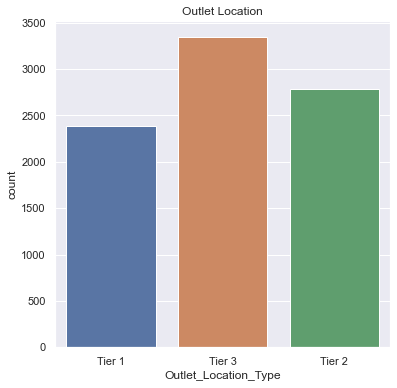

In [72]:
plt.figure(figsize=(6,6))
sns.countplot(train['Outlet_Location_Type'])

plt.title('Outlet Location')

## Data Pre-Processing 

In [73]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [74]:
from sklearn.preprocessing import LabelEncoder

In [76]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [77]:
encoder=LabelEncoder()

In [84]:
type(train['Outlet_Identifier'])

pandas.core.series.Series

In [95]:
train['Item_Identifier']=encoder.fit_transform(train['Item_Identifier'])
train['Item_Fat_Content']=encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type']=encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier']=encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size']=encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type']=encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type']=encoder.fit_transform(train['Outlet_Type'])


In [96]:
from sklearn.model_selection import train_test_split

In [108]:
Y=train['Item_Outlet_Sales']

In [113]:
X=train.drop('Item_Outlet_Sales',axis='columns')



In [117]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)

## Training our machine learning model and evaluating it
- we are Gradient Boosting Regressor for this problem

In [118]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from sklearn import metrics

In [119]:
reg=GBR()

In [120]:
reg.fit(X_train,Y_train)

GradientBoostingRegressor()

In [121]:
train_datapre=reg.predict(X_train)

In [123]:
r2_train= metrics.r2_score(Y_train,train_datapre)

In [124]:
print(r2_train)

0.6392308936704176


In [128]:
test_datapre=reg.predict(X_test)


In [129]:
r2_test=metrics.r2_score(Y_test,test_datapre)

In [130]:
print(r2_test)

0.5864696419154213
